<a href="https://colab.research.google.com/github/wiroel/my-repo/blob/main/Function_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering
feature transformation,,
5 types-
function(log, reciprocal, squareroot, custom) and power(box-cox and yeo-johnson)
and their final goal is to normally distribute the dataset,,
it doesnt affect decision tree or random forest but
for regression types, there we consider the data to be normally distributed

usually qq plot, or sns.distplot or pd.skew(){=0(normal distn) if -ve or +ve, skewed}

Log transform
-(not applicable in negative values)
-(if data is right-skewed)

Reciprocal
-(sometimes it work)

Square
-(for left skewed)

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/titanic.csv'

df = pd.read_csv(file_path, usecols=['Age', 'Fare', 'Survived'])
df.head()

Mounted at /content/drive


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [5]:
df['Age'].fillna(df["Age"].mean(), inplace=True)

<ipython-input-5-1e7be260d609>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df["Age"].mean(), inplace=True)


In [6]:
df.head(19)

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,29.699118,8.4583
6,0,54.000000,51.8625
7,0,2.000000,21.0750
8,1,27.000000,11.1333
9,1,14.000000,30.0708


In [7]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-9-2d5d14aba5ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

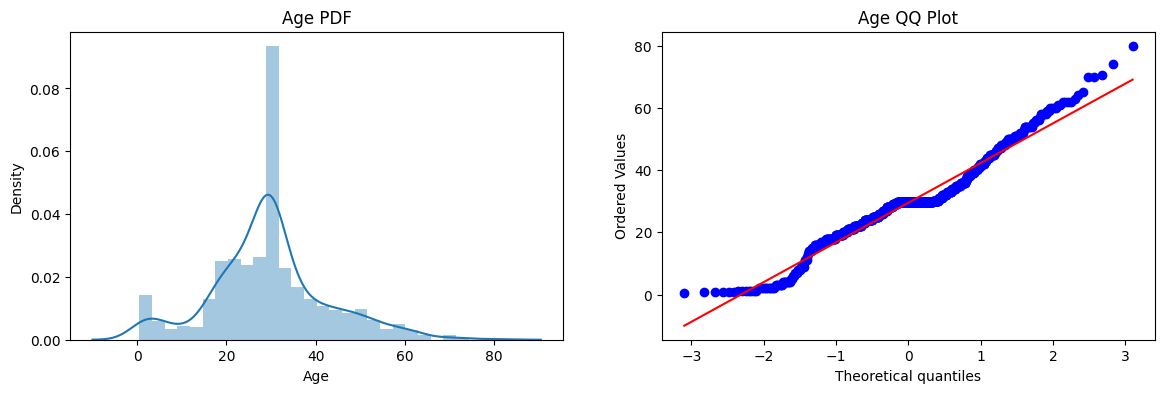

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

<ipython-input-10-3e88236a7a3f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ plot')

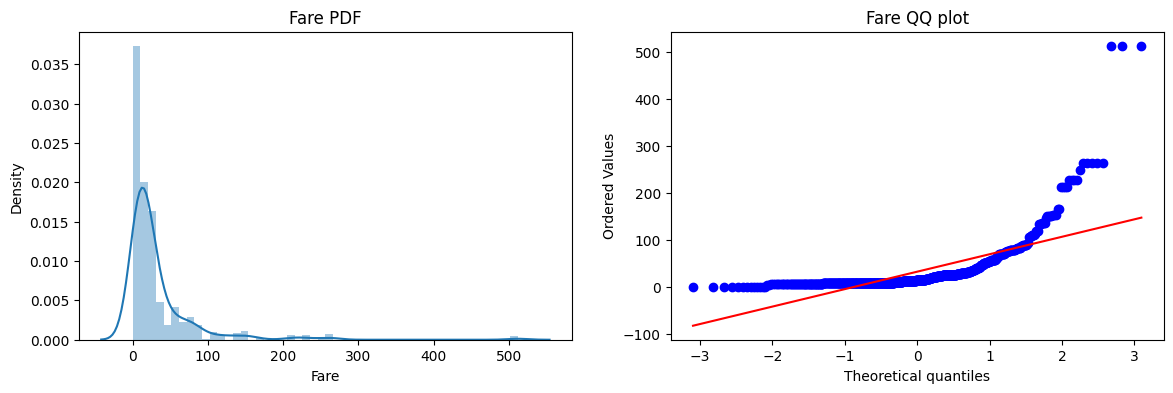

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

Distribution of fare is right skewed

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("LR accuracy:", accuracy_score(y_test, y_pred))
print("DT accuracy: ", accuracy_score(y_test, y_pred2))

LR accuracy: 0.6480446927374302
DT accuracy:  0.6871508379888268


## Log Transform
FunctionTransformer(func=nplog1p)
{data may contain 0 so log1p=data+1,, if data  doesnt contain 0, then can use log}

In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [15]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred= clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("LR accuracy:", accuracy_score(y_test, y_pred))
print("DT accuracy:", accuracy_score(y_test, y_pred2))

LR accuracy: 0.6815642458100558
DT accuracy: 0.6871508379888268


# Cross validation

In [23]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv=5)))
print('DT', np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=5)))

LR 0.6780114242671521
DT 0.6442156801205198


Text(0.5, 1.0, 'Fare after log')

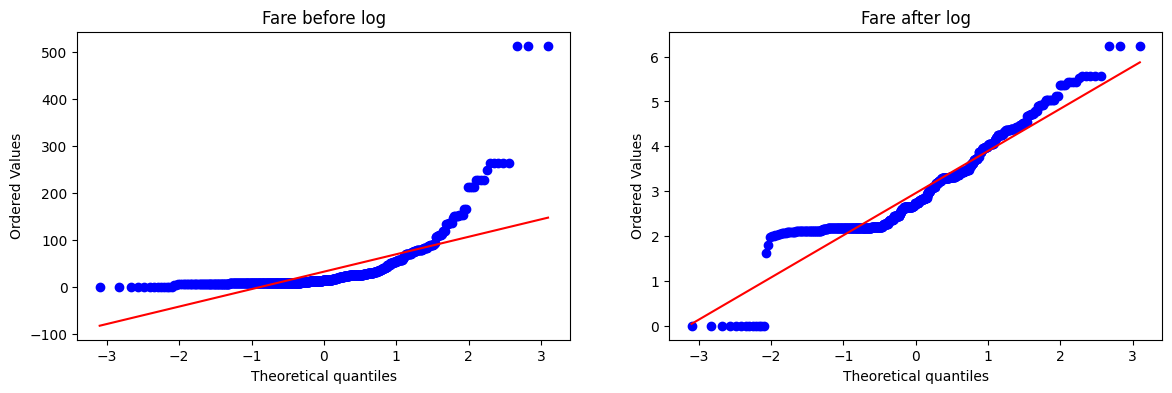

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train["Fare"], dist='norm', plot=plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("Fare after log")

Text(0.5, 1.0, 'Age after log')

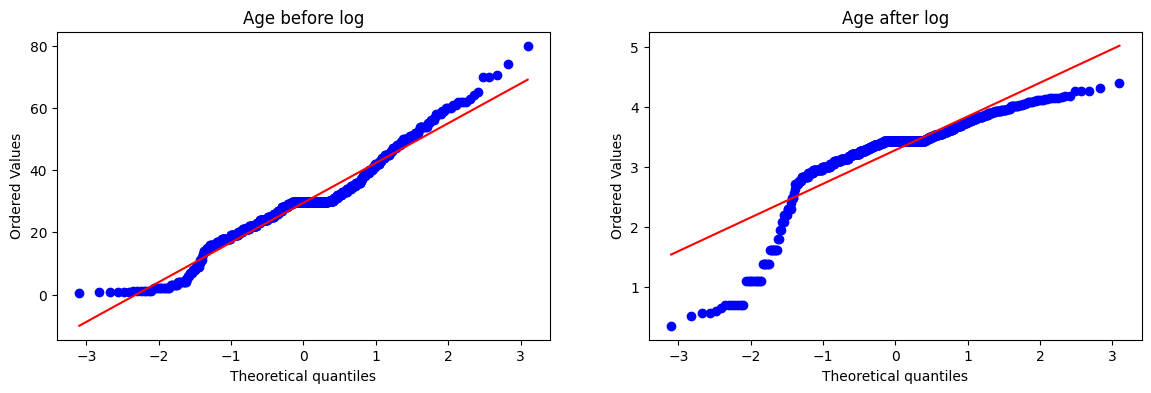

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after log')

sheet it got worse

In [19]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)


print('LR', accuracy_score(y_test, y_pred))
print("DT", accuracy_score(y_test, y_pred2))

LR 0.6703910614525139
DT 0.664804469273743


In [22]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=6)))
print('DT', np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=6)))

LR 0.6712316343188828
DT 0.6408564604873329


In [27]:
def apply_traansform(transform):
  X = df.iloc[:, 1:3]
  y = df.iloc[:, 0]

  trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

  X_trans = trf.fit_transform(X)


  clf = LogisticRegression()

  print('LR', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=6)))


  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X['Fare'], dist='norm', plot=plt)
  plt.title('Fare before transform')

  plt.subplot(122)
  stats.probplot(X_trans[:, 0], dist='norm', plot=plt)
  plt.title('Fare after transform')

  plt.show()


LR 0.621795453171292


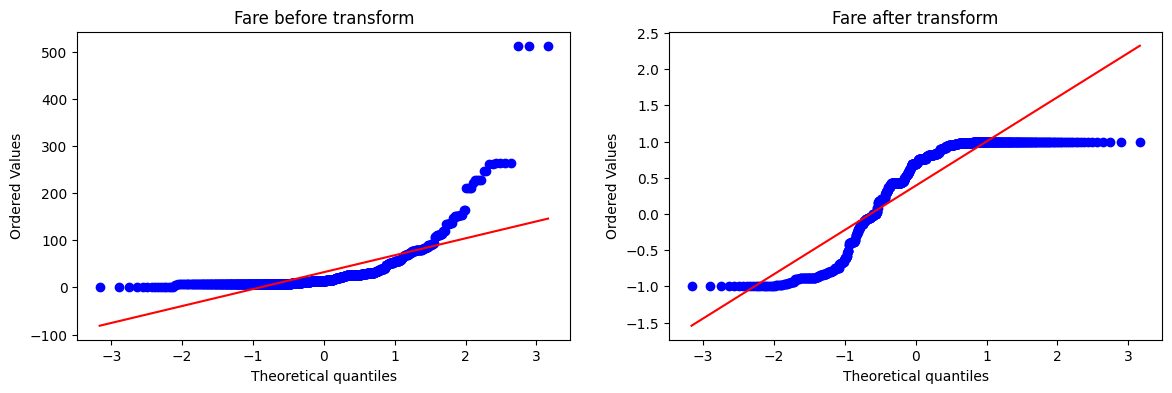

In [32]:
apply_traansform(np.sin)